## PROJECT:    PREDICTING CHARGES OF HEALTH INSURANCE

IMPORTING LIBRARIES

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

import warnings
warnings.filterwarnings('ignore')

In [8]:
data =pd.read_csv(r"C:\Users\Rajani-janah\Desktop\Data Science\Data mining\datasets\Health_insurance.csv")
display(data.head())
original_data = data.copy(deep=True) # Copy DataFrame before....

print('\n\033[1mInference:\033[0m The Dataset consists of {} features & {} observations.'.format(data.shape[1], data.shape[0]))

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Inference: The Dataset consists of 7 features & 1338 observations.


In [5]:
# First Five rows of data
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#Shape of the data
data.shape

(1338, 7)

In [9]:
contingency_table1 = pd.crosstab(data['sex'],data['smoker'],margins = True)
contingency_table1

smoker,no,yes,All
sex,,,
female,547,115,662
male,517,159,676
All,1064,274,1338


In [10]:
from scipy.stats import chi2_contingency
def chi_square(c1,c2):
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(data[c1],data[c2],margins = False))# make sure margins = False

    print(exp_val)
    #print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)
    print(f'\nChi-square is : {chi_2}', f'\n\np_value is : {p_val}', f'\n\ndegree of freedom is :{dof}')

    if p_val < 0.05:# consider significan level is 5%
        print("\nThere is some correlation between the two variables at 0.05 significant level")
    else:
        print("\nThere is no correlation between the two variables")

In [11]:
chi_square("smoker",'sex')

[[526.43348281 537.56651719]
 [135.56651719 138.43348281]]

Chi-square is : 7.39291081459996 

p_value is : 0.006548143503580696 

degree of freedom is :1

There is some correlation between the two variables at 0.05 significant level


In [15]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [16]:
chi_square("region",'sex')

[[160.30493274 163.69506726]
 [160.79970105 164.20029895]
 [180.09566517 183.90433483]
 [160.79970105 164.20029895]]

Chi-square is : 0.43513679354327284 

p_value is : 0.9328921288772233 

degree of freedom is :3

There is no correlation between the two variables


In [12]:
import researchpy as rp
rp.summary_cont(data['age'].groupby(data['sex']))

ModuleNotFoundError: No module named 'researchpy'

In [ ]:
import statsmodels.formula.api as smf

model = smf.ols("age ~ C(sex)", data= data).fit()
stats.shapiro(model.resid)

In [13]:
#Importing the dataset

data =pd.read_csv(r"C:\Users\Rajani-janah\Desktop\Data Science\Data mining\datasets\Health_insurance.csv")
display(data.head())
original_data = data.copy(deep=True) # Copy DataFrame before....

print('\n\033[1mInference:\033[0m The Dataset consists of {} features & {} observations.'.format(data.shape[1], data.shape[0]))

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Inference: The Dataset consists of 7 features & 1338 observations.


In [15]:
#X=data.select_dtypes(exclude='object')
X = data[['age', 'bmi', 'children']]
X.head()
y = data['charges']#y needs to be a Series or 1D array

In [16]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [17]:
import statsmodels.api as sm
X2 = sm.add_constant(X) 
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Thu, 13 Jan 2022   Prob (F-statistic):           8.80e-37
Time:                        07:41:57   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6916.2433   1757.480     -3.935      0.0

In [7]:
 #Data type of each attribute

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#Checking the presence of missing values

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#Five point summary of numerical attributes

data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
#listing unique variables of object columns
{col:list(data[col].unique()) for col in data.select_dtypes('object')}

{'sex': ['female', 'male'],
 'smoker': ['yes', 'no'],
 'region': ['southwest', 'southeast', 'northwest', 'northeast']}

In [11]:
region_serie=data.groupby('region').size()
smoker_serie=data.groupby('smoker').size()
sex_serie=data.groupby('sex').size()

series={
    
    'Sex':sex_serie,
    'Region':region_serie,
    'Smoker':smoker_serie
    
}


def pie_plot(serie,title):
    
    
    serie.plot(kind='pie',title=title, figsize=[20,8],colors=['#77dd77','#fdfd96','#84b6f4','#fdcae1'],
          autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*serie.sum()))
    plt.ylabel(None)

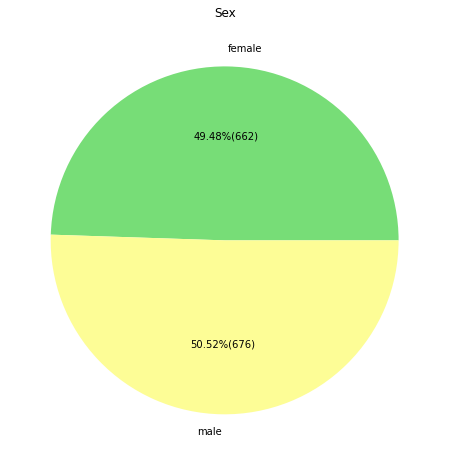

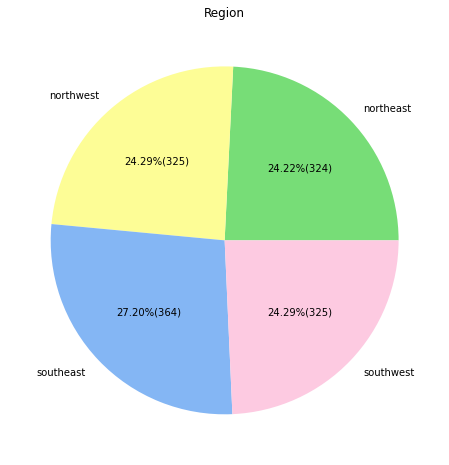

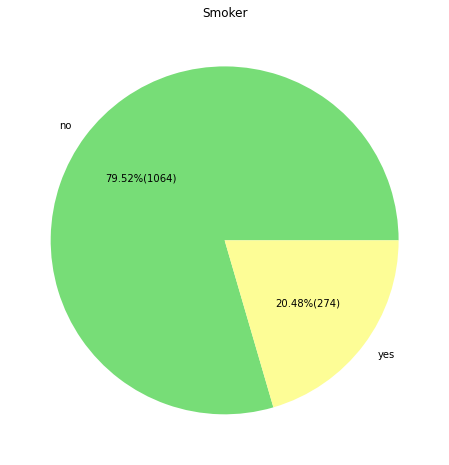

In [12]:
for i,j in series.items():
    
    plt.subplots(1,1)
    pie_plot(j,i)

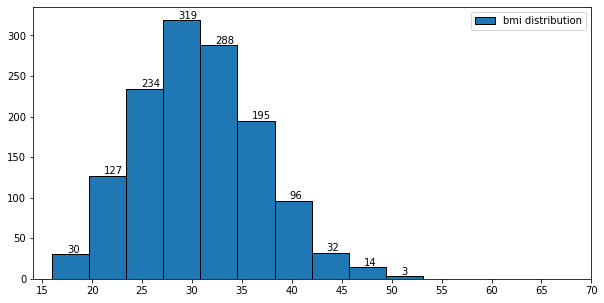

In [12]:
#bmi' distribution

fg,ax = plt.subplots(figsize=(10,5))
n, bins, patches = ax.hist(data.bmi,edgecolor='k',label='bmi distribution')
ax.set_xticks(ticks=range(15,75,5))
for idx, value in enumerate(n):
    ax.text(bins[idx]+1.5,n[idx]+2,round(value))
    ax.legend()
    fg.show

In [ ]:
#'bmi' is normally distributed

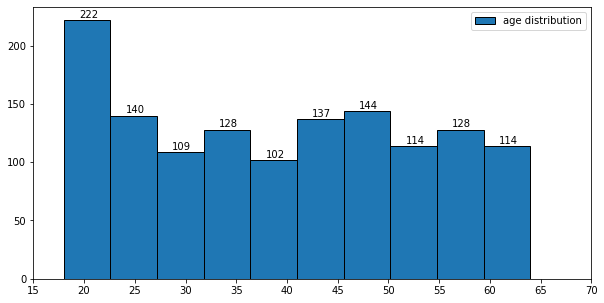

In [13]:
#age' distribution

fg,ax = plt.subplots(figsize=(10,5))
n, bins, patches = ax.hist(data.age,edgecolor='k',label='age distribution')
ax.set_xticks(ticks=range(15,75,5))
for idx, value in enumerate(n):
  ax.text(bins[idx]+1.5,n[idx]+2,round(value))
ax.legend()
fg.show()

In [ ]:
#age' is uniformally distributed

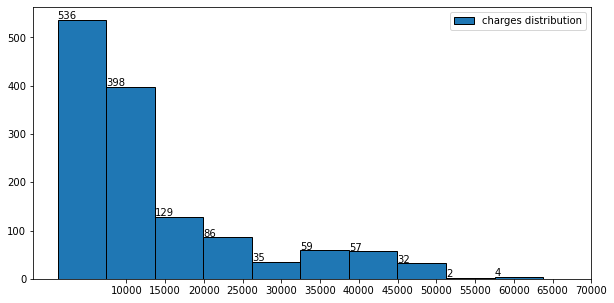

In [14]:
#charges' distribution

fg,ax = plt.subplots(figsize=(10,5))
n, bins, patches = ax.hist(data.charges,edgecolor='k',label='charges distribution')
ax.set_xticks(ticks=range(10000,75000,5000))
for idx, value in enumerate(n):
    ax.text(bins[idx]+1.5,n[idx]+2,round(value))
    ax.legend()
    fg.show

In [ ]:
#charges' are highly skewed

<function matplotlib.pyplot.show(close=None, block=None)>

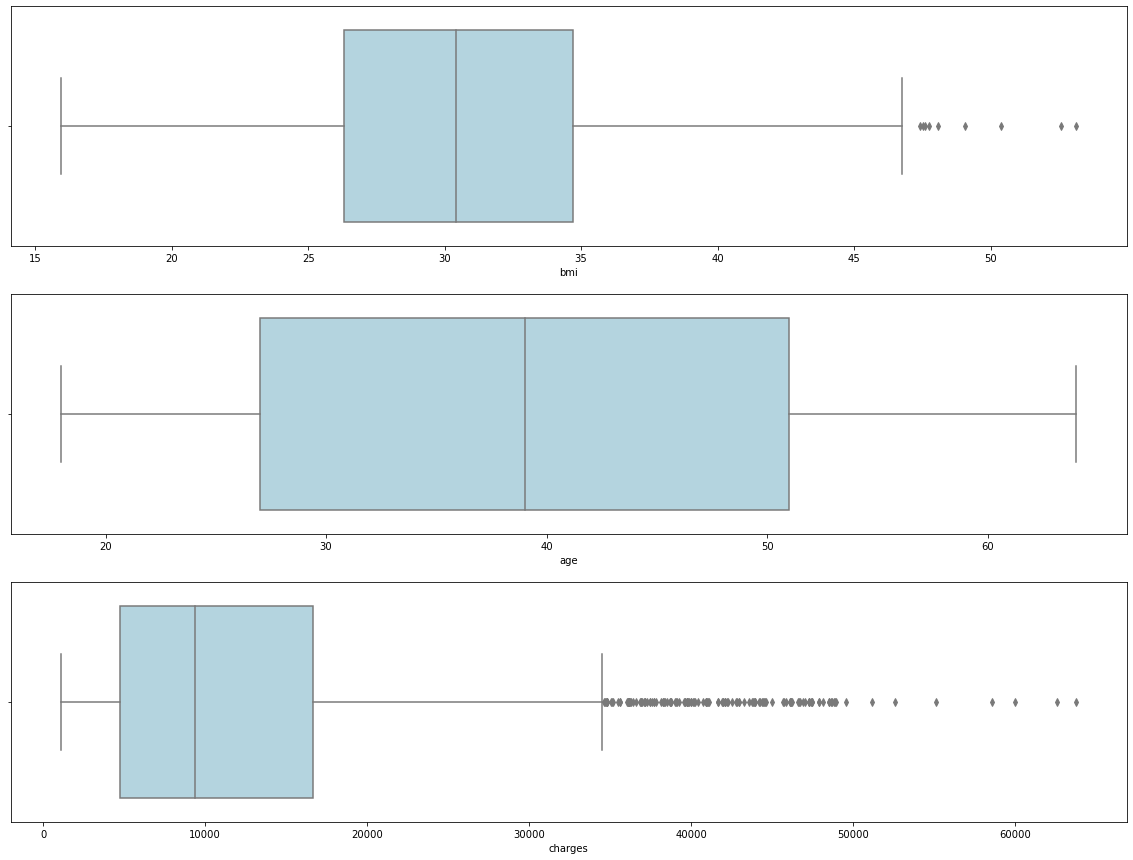

In [15]:
#Checking the presence of outliers in 'bmi','age' and 'charges' columns

plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= data.bmi, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= data.age, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= data.charges, color='lightblue')

plt.show

In [ ]:
#'bmi' has very few outliers (extreme values)
#age' has no outliers
#charges' are highly skewed so lot of outliers present

<function matplotlib.pyplot.show(close=None, block=None)>

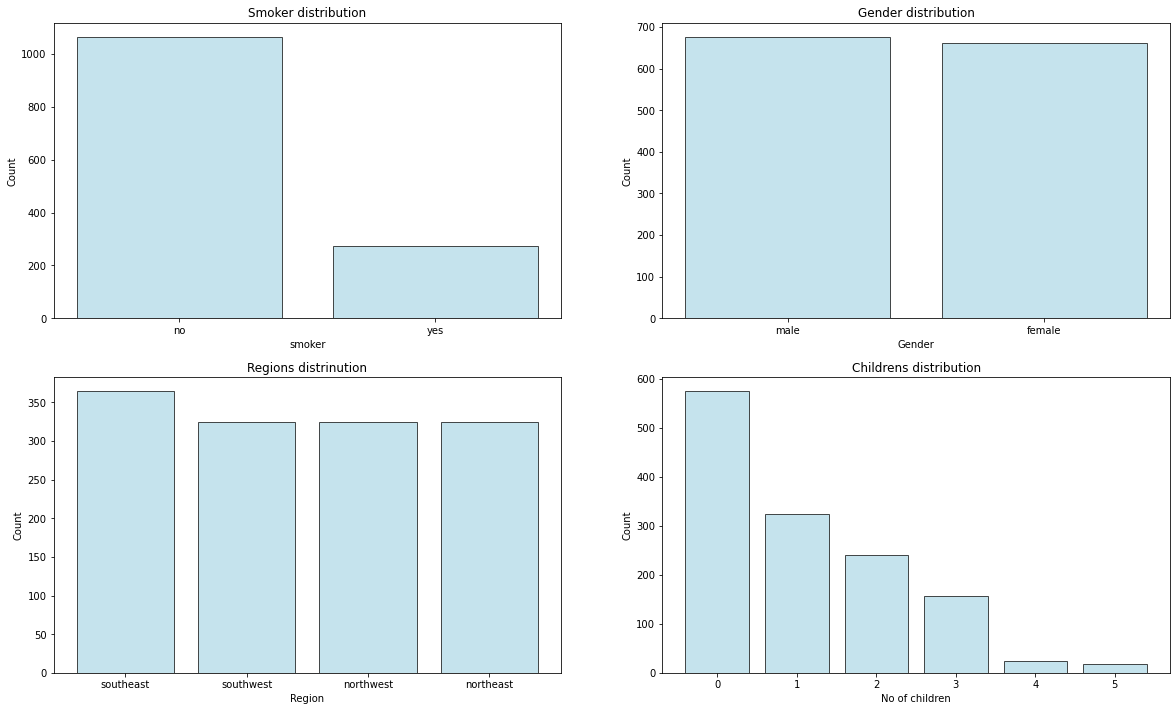

In [16]:
#Distribution of categorical columns (include children)
plt.figure(figsize=(20,25))


x=data.smoker.value_counts().index  # values for x-axis
y=[data['smoker'].value_counts()[i] for i in x] #count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y,align='center',color = 'lightblue',edgecolor='black',alpha = 0.7)  # bar chart plotting
plt.xlabel('smoker')
plt.ylabel('Count')
plt.title('Smoker distribution')

x1 = data.sex.value_counts().index   #values for x-axis
y1 = [data['sex'].value_counts()[j] for j in x1]  # count of each class on y-axis


plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  # bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2 = data.region.value_counts().index # values for x-axis
y2 = [data['region'].value_counts()[k] for k in x2]  # count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2,align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7) # bar chart
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Regions distrinution')

x3 = data.children.value_counts().index
y3 = [data['children'].value_counts()[l] for l in x3]

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color= 'lightblue',edgecolor = 'black',alpha = 0.7)
plt.xlabel('No of children')
plt.ylabel('Count')
plt.title('Childrens distribution')

plt.show

Bivariate analysis:charges of smoker and non smoker

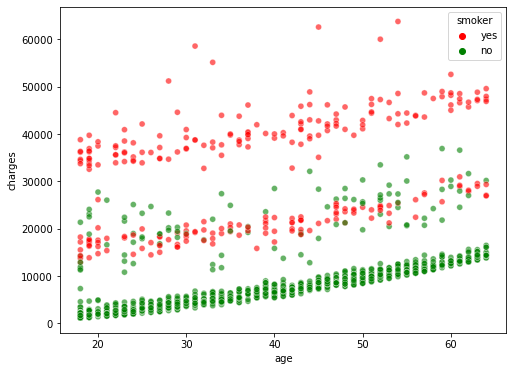

In [17]:
# scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data.age, data.charges,hue=data.smoker,palette= ['red','green'],alpha=0.6)
plt.show()

Smokers dependency on charges differs from non-smoker.
Smokers claim significantly more money as compared to non-smoker.

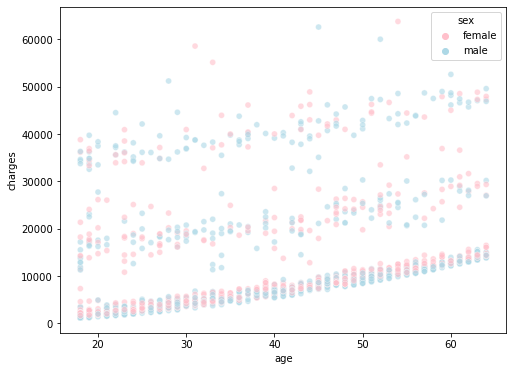

In [18]:
 #bmi' of males and females

plt.figure(figsize=(8,6))
sns.scatterplot(data.age, data.charges,hue=data.sex,palette= ['pink','lightblue'],alpha=0.6)
plt.show()

No relation appeared between gender and charges.
Therefore, no effect of gender on 'bmi'.

In [32]:
data.smoker.value_counts()

0    1064
1     274
Name: smoker, dtype: int64

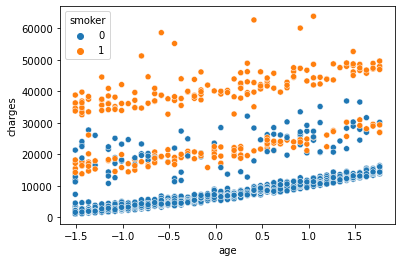

In [33]:
# Check the charges of smokers and non-smokers across different ages
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = data);

#By looking into above graph, we can say "charges of smokers and non-smokers are different". But is the difference statistically significant?

Steps:
    1.State the H0 and Ha
    2. Decide the significance level: alpha = 0.05
    3. Identify the test-statistic: 2 sample t - test
    4. Calculate P_value using test-statistic/t-score
    

In [18]:
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols

import statsmodels.api as sm

 Is the distribution of bmi across women with no children, one child and two children, the same?

In [21]:
# Check the bmi of women with no children, one child and two children

zero_child = data[data['children'] == 0]
women_zero_child_bmi = zero_child[zero_child['sex'] == 'female'].bmi

one_child = data[data['children'] == 1]
women_one_child_bmi = one_child[one_child['sex'] == 'female'].bmi

two_child = data[data['children'] == 2]
women_two_child_bmi = two_child[two_child['sex'] == 'female'].bmi

children_bmi_data = pd.DataFrame()

data1            = pd.DataFrame({'children': 'zero', 'bmi':women_zero_child_bmi})
data2          = pd.DataFrame({'children': 'one', 'bmi':women_one_child_bmi})
data3          = pd.DataFrame({'children': 'two', 'bmi':women_two_child_bmi})

children_bmi_data = children_bmi_data.append(data1) 
children_bmi_data = children_bmi_data.append(data2) 
children_bmi_data = children_bmi_data.append(data3)

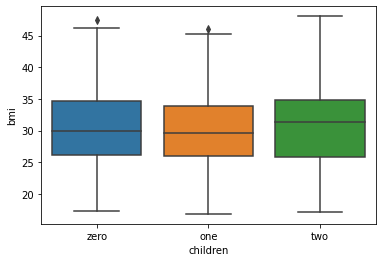

In [23]:
sns.boxplot(x = "children", y = "bmi", data = children_bmi_data);

In [24]:
#. Calculate P_value using ANOVA table
mod = ols('bmi ~ children', data = children_bmi_data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

p_value = aov_table['PR(>F)'][0]

                sum_sq     df         F    PR(>F)
children     24.590123    2.0  0.334472  0.715858
Residual  20695.661583  563.0       NaN       NaN


In [25]:
#Decide to Reject or Accept Null Hypothesis
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : False


Hence we fail to reject Null Hypothesis (we have enough (95% and 99%) evidence to prove 
                                         that women with no children, one child and two children has no effect on bmi

Feature Engineering

In [13]:
from sklearn.preprocessing import LabelEncoder

for obj_col in data.select_dtypes('object'):
  LE = LabelEncoder()
  data[obj_col] = LE.fit_transform(data[obj_col]) #Converting categorical data to numerical

In [14]:
from sklearn.preprocessing import StandardScaler

for num_col in data[['age','bmi']]:
  SS = StandardScaler()
  data[num_col] = SS.fit_transform(data[[num_col]]) #Scaling numerical data

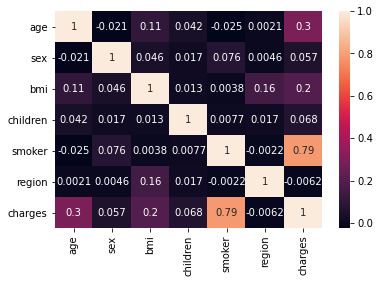

In [15]:
sns.heatmap(data.corr(),annot=True);

In [16]:
from sklearn.model_selection import train_test_split

X = data[['age','bmi','smoker']]
Y = data['charges']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=12)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1070, 3), (268, 3), (1070,), (268,))

In [17]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train, Y_train)

Y_Pred = LR.predict(X_test)

In [18]:
LR.intercept_

8350.76405105929

In [19]:
LR.coef_

array([ 3717.14494198,  2030.9733929 , 23865.19864305])

In [20]:
pd.DataFrame({'Actual': Y_test,'Predicted' : Y_Pred}).head()

,Actual,Predicted
936,32108.66282,9309.983403
728,2217.60120,5941.967036
1307,21472.47880,29461.130808
924,6250.43500,6868.052476
137,2045.68525,1968.095149


In [21]:
from sklearn import metrics
import numpy as np
  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_Pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_Pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_Pred))) 

Mean Absolute Error: 4403.094701998076
Mean Squared Error: 42917728.37502345
Root Mean Squared Error: 6551.162368238437


In [23]:
data.charges.mean()/10

1327.0422265141256

In [ ]:
#Since, RMSE value of 6551.16 is not less than or equal to mean of targer variable i.e., charges (1327.04).
#Our model did not perform/predicted well, we can tune this model or alter supplied column to see any positive change.